### **Kelompok 5**
### **> Alghifari Rasyid Zola (105222006)**
### **> Fauzan Azhima (105222003)**

### ======================================================================

# **Klasifikasi Gambar dengan menggunakan model Random Forest**

### Mengelompokkan gambar dari dataset yang terdisi dari 2 kelas yaitu **anemic** dan **non-anemic**

### ======================================================================

## **Exploratory Data Analysis (EDA)**

### ✅ Tujuan:
### - Memahami distribusi kelas
### - Meninjau dimensi & format gambar
### - Visualisasi contoh gambar


### Cek Jumlah Gambar per Kelas

In [5]:
import os
from skimage import color, exposure
from skimage.feature import hog

from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            images.append(img)
    return images

# Ganti path sesuai dengan struktur folder Anda
anemic_images = load_images_from_folder('dataset/anemic')
nonanemic_images = load_images_from_folder('dataset/nonanemic')

# 2. EDA
print(f"Jumlah gambar anemic: {len(anemic_images)}")
print(f"Jumlah gambar non-anemic: {len(nonanemic_images)}")

Jumlah gambar anemic: 2563
Jumlah gambar non-anemic: 1714


In [6]:
anemic_path = 'dataset/anemic'
nonanemic_path = 'dataset/nonanemic'

print('Anemic:', len(os.listdir(anemic_path)))
print('Non-anemic:', len(os.listdir(nonanemic_path)))

Anemic: 2563
Non-anemic: 1714


### Tampilkan Contoh Gambar

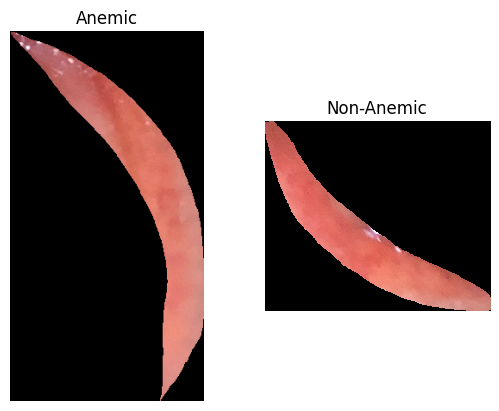

In [7]:
import matplotlib.pyplot as plt
import cv2

sample_anemic = cv2.imread(os.path.join(anemic_path, os.listdir(anemic_path)[0]))
sample_nonanemic = cv2.imread(os.path.join(nonanemic_path, os.listdir(nonanemic_path)[0]))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(cv2.cvtColor(sample_anemic, cv2.COLOR_BGR2RGB))
axs[0].set_title("Anemic")
axs[1].imshow(cv2.cvtColor(sample_nonanemic, cv2.COLOR_BGR2RGB))
axs[1].set_title("Non-Anemic")
for ax in axs:
    ax.axis('off')
plt.show()


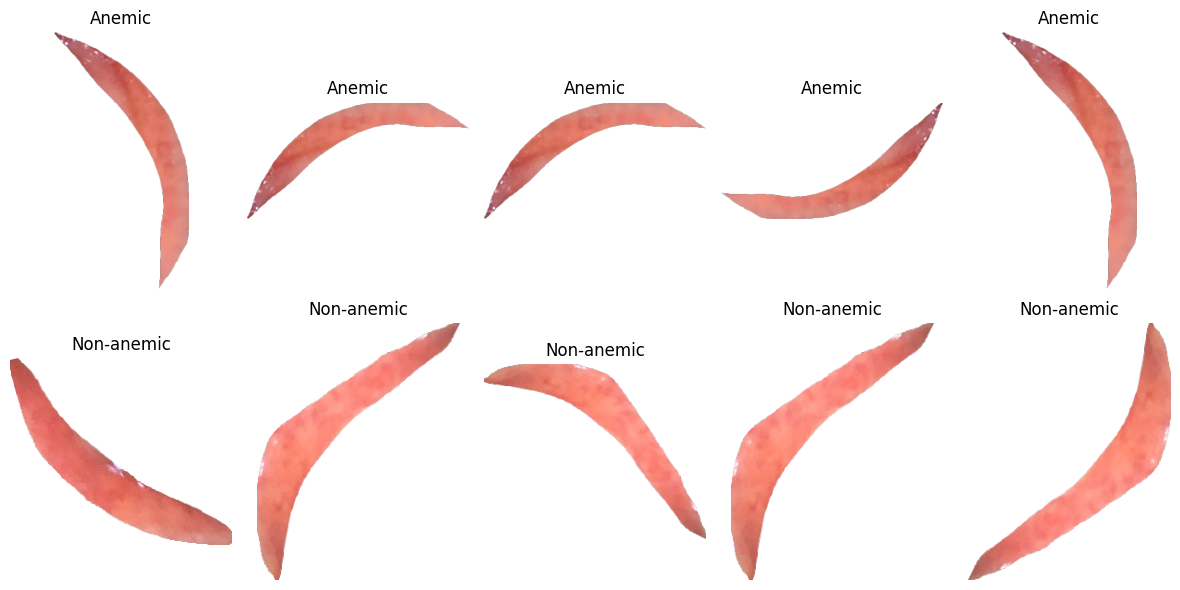

In [8]:
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(anemic_images[i])
    plt.title('Anemic')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.imshow(nonanemic_images[i])
    plt.title('Non-anemic')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Distribusi Kelas

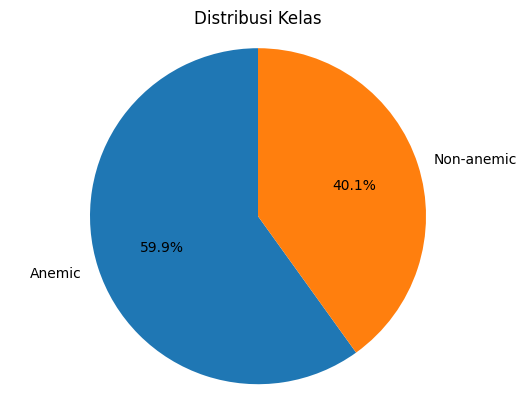

In [9]:
import matplotlib.pyplot as plt

labels = ['Anemic', 'Non-anemic']
counts = [len(os.listdir(anemic_path)), len(os.listdir(nonanemic_path))]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Kelas")
plt.axis('equal')
plt.show()

### ======================================================================

## **Preprocessing**

### ✅ Tujuan:

### - Resize gambar ke ukuran seragam
### - Normalisasi
### - Ekstraksi fitur (karena Random Forest tidak menerima raw image)

### Resize + flatten Gambar

In [10]:
import numpy as np

def load_images_from_folder(folder, label, size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, size)
            img = img.flatten()  # Ubah jadi 1D array
            images.append(img)
            labels.append(label)
    return images, labels

X_anemic, y_anemic = load_images_from_folder(anemic_path, 0)
X_nonanemic, y_nonanemic = load_images_from_folder(nonanemic_path, 1)

X = np.array(X_anemic + X_nonanemic)
y = np.array(y_anemic + y_nonanemic)


In [11]:
def preprocess_image(img, target_size=(224, 224)):
    # Resize
    img_resized = img.resize(target_size)
    # Convert to array dan normalisasi
    img_array = np.array(img_resized) / 255.0
    return img_array

### Normalisasi Data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### ======================================================================

## **Pemilihan Model & Training**

### ✅ Tujuan:

### - Memilih model (Random Forest)
### - Split data
### - Train model

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### ======================================================================

## **Evaluasi Model**

### ✅ Tujuan:

### - Mengukur performa model
### - Tampilkan akurasi, confusion matrix, classification report

Accuracy: 0.9077102803738317

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       513
           1       0.93      0.84      0.88       343

    accuracy                           0.91       856
   macro avg       0.91      0.90      0.90       856
weighted avg       0.91      0.91      0.91       856



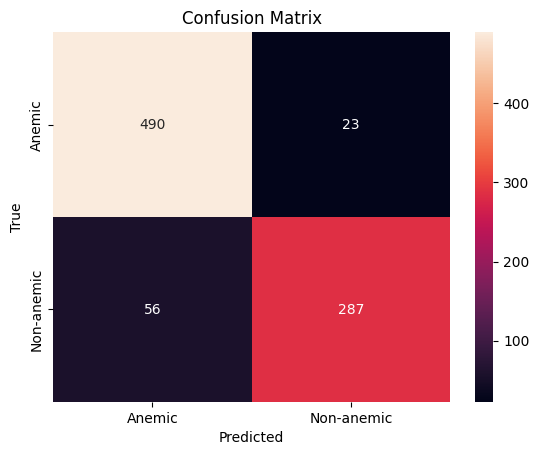

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Anemic', 'Non-anemic'], yticklabels=['Anemic', 'Non-anemic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
